Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Merged Data Columns:
Index(['Transaction ID', 'Customer ID', 'Payment_Mode', 'Gender', 'Age',
       'Income (USD/Month)', 'Date of Travel', 'Company', 'City',
       'KM Travelled', 'Price Charged', 'Cost of Trip', 'Population', 'Users'],
      dtype='object')
First few rows of the merged data:
   Transaction ID  Customer ID Payment_Mode Gender  Age  Income (USD/Month)  \
0        10000011        29290         Card   Male   28               10813   
1        10000012        27703         Card   Male   27                9237   
2        10000013        28712         Cash   Male   53               11242   
3        10000014        28020         Cash   Male   23               23327   
4        10000015        27182         Card   Male   33                8536   

   Date of Travel   Company        City  KM Travelled  Price Charged  \
0           42377  Pink Cab

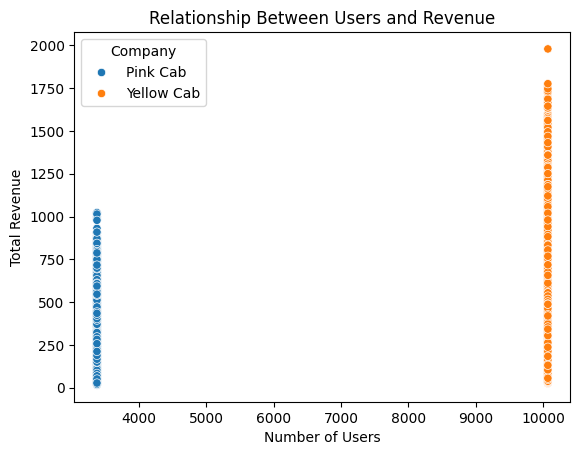

<ipython-input-7-96bfd4f3a526>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=company_revenue, x="Company", y="Revenue", palette='viridis')


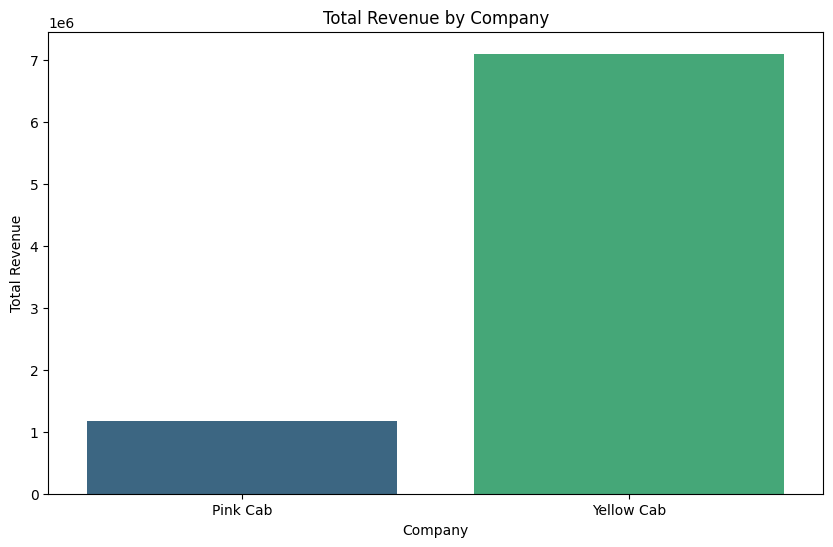

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cab_data = pd.read_csv('Cab_Data.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')
city_data = pd.read_csv('City.csv')

merged_data = pd.merge(transaction_data, customer_data, on='Customer ID', how='inner')

merged_data = pd.merge(merged_data, cab_data, on='Transaction ID', how='inner')

merged_data = pd.merge(merged_data, city_data, on='City', how='left')

print("Merged Data Columns:")
print(merged_data.columns)

print("First few rows of the merged data:")
print(merged_data.head())

merged_data['Number of Users'] = merged_data.groupby('Company')['Customer ID'].transform('nunique')

merged_data['Revenue'] = merged_data['Price Charged']

print("Revenue column:")
print(merged_data[['Transaction ID', 'Company', 'Price Charged', 'Revenue']].head())

company_revenue = merged_data.groupby('Company')['Revenue'].sum().reset_index()

sns.scatterplot(data=merged_data, x="Number of Users", y="Revenue", hue="Company")
plt.xlabel("Number of Users")
plt.ylabel("Total Revenue")
plt.title("Relationship Between Users and Revenue")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=company_revenue, x="Company", y="Revenue", palette='viridis')
plt.xlabel("Company")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Company")
plt.show()
